In [6]:
import numpy
import matplotlib.pyplot as p_list
import sys
import pandas as pd
pair = 'new_bams/pairs_31_50.samples.txt'
import os
# from tqdm import tqdm
samples1 = []
samples2 = []
consensuses = []
models = []
covs = []
vs = []
means = []
ps = []
with open(pair) as f:
    lines = f.readlines()
    for line in lines:
        loc1, sample1, loc2, sample2 = line.strip().split(',')
        for consensus in ['mpileup', 'true']:
            for p in [50, 60, 70, 80, 90, 95]:
                for cov in [5, 10, 30]:
                    for model in [0, 1]:
                        for v in range(3):
                            file_path=f'Results/{sample1}_{sample2}_cov{cov}_p{p}_v{v}_{consensus}_model{model}/{sample1}_{sample2}_cov{cov}_p{p}_v{v}_chrM_ra.final.results'
                            if os.path.exists(file_path):
                                with open(file_path) as f1:
                                    f1.readline()
                                    mean = float(f1.readline().split(',')[0])
                                samples1.append(sample1)
                                samples2.append(sample2)
                                covs.append(cov)
                                vs.append(v)
                                consensuses.append(consensus)
                                models.append(model)
                                ps.append(p)
                                means.append(mean)
                            
print(1)
df = pd.DataFrame({
    'sample1' : samples1,
    'sample2' : samples2,
    'model' : models,
    'proportion' : ps,
    'version' : vs,
    'coverage' : covs,
    "consensus" : consensuses,
    'mean' : means 
})     
print(2)
print(df)               
                            
                    
                    

1
2
      sample1  sample2  model  proportion  version  coverage consensus  \
0     NA18612  NA20759      0          50        0         5   mpileup   
1     NA18612  NA20759      0          50        1         5   mpileup   
2     NA18612  NA20759      0          50        2         5   mpileup   
3     NA18612  NA20759      1          50        0         5   mpileup   
4     NA18612  NA20759      1          50        1         5   mpileup   
...       ...      ...    ...         ...      ...       ...       ...   
2155  NA20759  NA20771      0          95        1        30      true   
2156  NA20759  NA20771      0          95        2        30      true   
2157  NA20759  NA20771      1          95        0        30      true   
2158  NA20759  NA20771      1          95        1        30      true   
2159  NA20759  NA20771      1          95        2        30      true   

          mean  
0     0.810100  
1     0.742439  
2     0.720651  
3     0.771884  
4     0.794943  
...  

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
consensus = 'mpileup'
coverage=30

In [25]:
q1 = df[(df.coverage==coverage) & (df.consensus == consensus)].groupby('proportion')['mean'].quantile(0.25)
q2 = df[(df.coverage==coverage) & (df.consensus == consensus)].groupby('proportion')['mean'].quantile(0.75)
mean = df[(df.coverage==30) & (df.consensus == consensus)].groupby('proportion')[['mean']].mean()

Text(0.5, 1.0, 'pairs_31_50, consensus:mpileup, coverage:30')

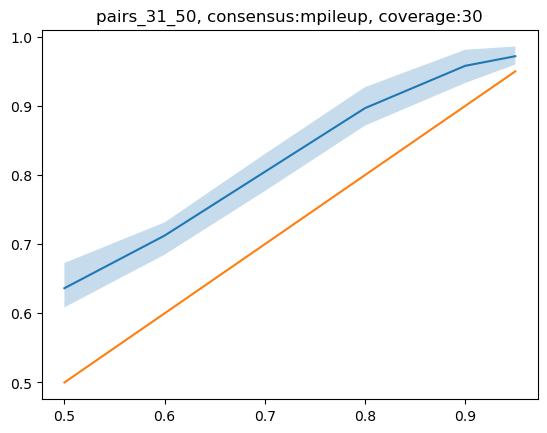

In [26]:

plt.plot(mean.index/100, mean['mean'])
plt.fill_between(x = q1.index/100, y1=list(q1), y2=list(q2), alpha=0.25)
plt.plot([0.5, 0.95],[0.5,0.95])
plt.title(f'pairs_31_50, consensus:{consensus}, coverage:{coverage}')